# Importing Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import os
import cv2

## Path of Dataset

In [ ]:
train_path="/content/drive/MyDrive/Dataset/train"
test_path="/content/drive/MyDrive/Dataset/my_test"
val_path="/content/drive/MyDrive/Dataset/Valid"

## Pre Processing

In [ ]:
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(80,80))
        x_train.append(img_arr)
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(80,80))
        x_test.append(img_arr)
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(80,80))
        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (80, 80),
                                                batch_size = 16,
                                                class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (80, 80),
                                            batch_size = 16,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                        target_size = (80, 80),
                                        batch_size = 16,
                                        class_mode = 'categorical')

Found 2350 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'Normal': 0, 'Osteoarthritis': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((2350,), (800,), (641,))

## Model Training

In [ ]:
dense_net = DenseNet201(input_shape = (80, 80, 3), weights='imagenet', include_top=False)

In [ ]:
#do not train the pre-trained layers of densenett201
for layer in dense_net.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(dense_net.output)

In [ ]:
#adding output layer.Sigmoid classifier is used as it is binary classification
x = Dropout(0.5)(x)
prediction = Dense(2, activation='sigmoid')(x)

model = Model(inputs=dense_net.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 86, 86, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 40, 40, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 40, 40, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

 conv2_block4_1_bn (BatchNormal  (None, 20, 20, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 20, 20, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 20, 20, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 20, 20, 192)  0          ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
          

                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 10, 10, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 10, 10, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 10, 10, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_concat (Concatena  (None, 10, 10, 192)  0          ['conv3_block1_concat[0][0]',    
 te)      

 conv3_block6_2_conv (Conv2D)   (None, 10, 10, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 10, 10, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 10, 10, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 10, 10, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 10, 10, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 10, 10, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 10, 10, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 10, 10, 128)  0          ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 5, 5, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 5, 5, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 5, 5, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 5, 5, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 5, 5, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 5, 5, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 5, 5, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 5, 5, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 5, 5, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 5, 5, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 5, 5, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 5, 5, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 5, 5, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 5, 5, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 5, 5, 128)    131072      ['conv4_block25_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 5, 5, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block29_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block29_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 5, 5, 1312)  0           ['conv4_block32_concat[0][0]',   
 ate)                                                             'conv4_block33_2_conv[0][0]']   
                                                                                                  
 conv4_block34_0_bn (BatchNorma  (None, 5, 5, 1312)  5248        ['conv4_block33_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block38_0_bn (BatchNorma  (None, 5, 5, 1440)  5760        ['conv4_block37_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 5, 5, 1440)  0           ['conv4_block38_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block38_1_conv (Conv2D)  (None, 5, 5, 128)    184320      ['conv4_block38_0_relu[0][0]']   
                                                                                                  
 conv4_block38_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block38_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block42_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block42_1_relu[0][0]']   
                                                                                                  
 conv4_block42_concat (Concaten  (None, 5, 5, 1600)  0           ['conv4_block41_concat[0][0]',   
 ate)     

 conv4_block46_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 5, 5, 1728)  0           ['conv4_block45_concat[0][0]',   
 ate)                                                             'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 5, 5, 1728)  6912        ['conv4_block46_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block47_0_relu (Activati  (None, 5, 5, 1728)  0           ['conv4_block47_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 2, 2, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 2, 2, 960)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 2, 2, 960)   3840        ['conv5_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_0_relu (Activatio  (None, 2, 2, 960)   0           ['conv5_block3_0_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 2, 2, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, 2, 2, 128)    139264      ['conv5_block7_0_relu[0][0]']    
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv5_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 conv5_block11_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 2, 2, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv5_block11_1_relu[0][0]']   
                                                                                                  
 conv5_block11_concat (Concaten  (None, 2, 2, 1248)  0           ['conv5_block10_concat[0][0]',   
 ate)                                                             'conv5_block11_2_conv[0][0]']   
          

                                                                                                  
 conv5_block15_concat (Concaten  (None, 2, 2, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_block16_0_bn (BatchNorma  (None, 2, 2, 1376)  5504        ['conv5_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block16_0_relu (Activati  (None, 2, 2, 1376)  0           ['conv5_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 conv5_block20_0_relu (Activati  (None, 2, 2, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 2, 2, 128)    192512      ['conv5_block20_0_relu[0][0]']   
                                                                                                  
 conv5_block20_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv5_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_1_relu (Activati  (None, 2, 2, 128)   0           ['conv5_block20_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block24_1_relu (Activati  (None, 2, 2, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block24_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv5_block24_1_relu[0][0]']   
                                                                                                  
 conv5_block24_concat (Concaten  (None, 2, 2, 1664)  0           ['conv5_block23_concat[0][0]',   
 ate)                                                             'conv5_block24_2_conv[0][0]']   
                                                                                                  
 conv5_block25_0_bn (BatchNorma  (None, 2, 2, 1664)  6656        ['conv5_block24_concat[0][0]']   
 lization)

 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 2, 2, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block29_0_relu (Activati  (None, 2, 2, 1792)  0           ['conv5_block29_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block29_1_conv (Conv2D)  (None, 2, 2, 128)    229376      ['conv5_block29_0_relu[0][0]']   
                                                                                                  
 conv5_blo

                                                                                                  
 dropout (Dropout)              (None, 7680)         0           ['flatten[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 2)            15362       ['dropout[0][0]']                
                                                                                                  
Total params: 18,337,346
Trainable params: 15,362
Non-trainable params: 18,321,984
__________________________________________________________________________________________________


In [ ]:
model.compile(
 loss='sparse_categorical_crossentropy',
 optimizer="adam",
 metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
checkpoint = ModelCheckpoint('./content/drive/MyDrive/Dataset/DenseNet Model/weights-imporvement-{epoch:02d}-{val_accuracy:.2f}.hdf5',
                            monitor = 'val_accuracy', save_best_only = True, verbose = 1)
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)
#Early stopping to avoid overfitting of model
log_csv = CSVLogger('/content/drive/MyDrive/Dataset/DenseNet Model/my_log.csv', separator=',', append = False)

In [ ]:
# fit the model
history = model.fit(
 train_x,
 train_y,
 validation_data=(val_x,val_y),
 epochs=50,
 callbacks=[checkpoint, log_csv],
 batch_size=16,shuffle=True)

Epoch 1/50
147/147 [==============================] - ETA: 0s - loss: 0.7405 - accuracy: 0.7536
Epoch 1: val_accuracy improved from -inf to 0.69735, saving model to ./Osteoarthritis_Assignment_dataset/DenseNet Model\weights-imporvement-01-0.70.hdf5
147/147 [==============================] - 33s 111ms/step - loss: 0.7405 - accuracy: 0.7536 - val_loss: 1.0682 - val_accuracy: 0.6973
Epoch 2/50
147/147 [==============================] - ETA: 0s - loss: 0.5514 - accuracy: 0.8068
Epoch 2: val_accuracy improved from 0.69735 to 0.90016, saving model to ./Osteoarthritis_Assignment_dataset/DenseNet Model\weights-imporvement-02-0.90.hdf5
147/147 [==============================] - 9s 60ms/step - loss: 0.5514 - accuracy: 0.8068 - val_loss: 0.2379 - val_accuracy: 0.9002
Epoch 3/50
146/147 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8348
Epoch 3: val_accuracy did not improve from 0.90016
147/147 [==============================] - 8s 55ms/step - loss: 0.4674 - accuracy: 0.8

147/147 [==============================] - 8s 58ms/step - loss: 0.4325 - accuracy: 0.8647 - val_loss: 0.3315 - val_accuracy: 0.8846
Epoch 30/50
146/147 [============================>.] - ETA: 0s - loss: 0.4058 - accuracy: 0.8767
Epoch 30: val_accuracy did not improve from 0.90016
147/147 [==============================] - 8s 56ms/step - loss: 0.4118 - accuracy: 0.8757 - val_loss: 0.3667 - val_accuracy: 0.8705
Epoch 31/50
147/147 [==============================] - ETA: 0s - loss: 0.3920 - accuracy: 0.8757
Epoch 31: val_accuracy did not improve from 0.90016
147/147 [==============================] - 8s 56ms/step - loss: 0.3920 - accuracy: 0.8757 - val_loss: 0.4868 - val_accuracy: 0.8674
Epoch 32/50
146/147 [============================>.] - ETA: 0s - loss: 0.3493 - accuracy: 0.8810
Epoch 32: val_accuracy did not improve from 0.90016
147/147 [==============================] - 8s 56ms/step - loss: 0.3477 - accuracy: 0.8813 - val_loss: 0.3835 - val_accuracy: 0.8830
Epoch 33/50
146/147 [====

## Plotting Accuracy and Loss

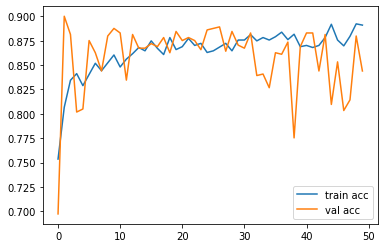

In [ ]:
import matplotlib.pyplot as plt

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('dense_net-acc-rps-1.png')
plt.show()

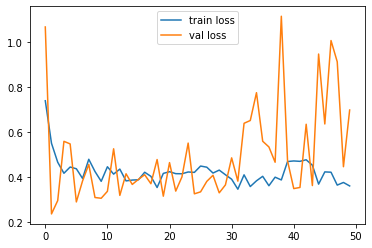

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('dense_net-loss-rps-1.png')
plt.show()

## Model Accuracy

In [ ]:
print("[Loss, Accuracy] = ", model.evaluate(test_x,test_y,batch_size=16))

50/50 [==============================] - 2s 40ms/step - loss: 0.2328 - accuracy: 0.9013
[Loss, Accuracy] =  [0.2328011691570282, 0.9012500047683716]


## Testing DataSet

In [ ]:
image_test_path="./Osteoarthritis_Assignment_dataset/test_images"
image_test_lst=[]
for img in os.listdir(image_test_path):
    image_path=image_test_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(80,80))
    image_test_lst.append(np.array(img_arr))

x = np.asarray(image_test_lst)
x = x/255.0

model.predict(x)

1/1 [==============================] - 5s 5s/step


array([[0.82663184, 0.01932076],
       [0.5729478 , 0.06122284],
       [0.00324166, 0.99058855],
       [0.01962125, 0.99337643]], dtype=float32)

## Model Saving

In [ ]:
model.save('../Osteoarthritis_Assignment_dataset/DenseNet Model/dense_net_model.h5')

## Classification Report and Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

25/25 [==============================] - 5s 56ms/step


In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       381
           1       0.93      0.88      0.90       419

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[351  30]
 [ 49 370]]
